<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 18** | Exercício 2 - Regressão Logística I

Aluna [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 08 de setembro de 2024

---

# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [40]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [42]:
def analise_bivariada(dataframe:pd.DataFrame, x:str, y:str) -> pd.DataFrame:
    
    tab_sexo = pd.crosstab(index=dataframe[x], 
                                 columns=dataframe[y], 
                                 margins=True, 
                                 margins_name='total')
    
    tab_sexo['prob'] = tab_sexo[1] / tab_sexo['total']
    
    tab_sexo['odds'] = tab_sexo[1] / tab_sexo[0]
    tab_sexo['odds_ratio'] = tab_sexo['odds'] / tab_sexo.loc['total', 'odds']

    tab_sexo['logito'] = np.log(tab_sexo['odds'])
    tab_sexo['WOE'] = np.log(tab_sexo['odds'] / tab_sexo.loc['total', 'odds'])
    
    return tab_sexo

In [43]:
#sex: sexo (1 = male; 0 = female)

analise_bivariada(dataframe=df, x='sex', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [46]:
# fbs: açúcar no sangue em jejum > 120 mg/dl (1 = True; 0 = False)

analise_bivariada(dataframe=df, x='fbs', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
fbs,,,,,,,,
0.0,141,117,258,0.453488,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,0.488889,0.956522,1.128558,-0.044452,0.120941
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [47]:
#exang: angina induzida por exercício(1 = sim; 0 = não)
analise_bivariada(dataframe=df, x='exang', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
exang,,,,,,,,
0.0,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


<br>

 Qual delas parece discriminar mais o risco?
 
 Entre as três variáveis analisadas, a que indica maior risco é a ```exang``` - angina induzida por exercício, devido o percentual de probabilidade ser o maior.

<br>

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [48]:
def analise_quant_continuas(df, resposta, explicativa, num_categorias=5):
    df['grupo'] = pd.qcut(df[explicativa], num_categorias, duplicates='drop')
    tab_sexo = pd.crosstab(df['grupo'], df[resposta], margins=True, margins_name='total')
    
    tab_sexo['prob'] = tab_sexo[1] / tab_sexo['total']    
    tab_sexo['odds'] = tab_sexo[1] / tab_sexo[0]
    tab_sexo['odds_ratio'] = tab_sexo['odds'] / tab_sexo.loc['total', 'odds']
    tab_sexo['logito'] = np.log(tab_sexo['odds'])
    tab_sexo['WOE'] = np.log(tab_sexo['odds'] / tab_sexo.loc['total', 'odds'])
    return tab_sexo

In [49]:
tab_age = analise_quant_continuas(df=df, resposta='flag_doente', explicativa='age')
tab_age

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
grupo,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [50]:
tab_trestbps = analise_quant_continuas(df=df, resposta='flag_doente', explicativa='trestbps')
tab_trestbps

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
grupo,,,,,,,,
"(93.999, 120.0]",60,37,97,0.381443,0.616667,0.727578,-0.483427,-0.318034
"(120.0, 126.0]",10,15,25,0.600000,1.500000,1.769784,0.405465,0.570858
"(126.0, 134.0]",35,27,62,0.435484,0.771429,0.910175,-0.259511,-0.094119
"(134.0, 144.6]",34,24,58,0.413793,0.705882,0.832840,-0.348307,-0.182914
"(144.6, 200.0]",25,36,61,0.590164,1.440000,1.698993,0.364643,0.530036
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [51]:
tab_chol = analise_quant_continuas(df=df, resposta='flag_doente', explicativa='chol')
tab_chol

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
grupo,,,,,,,,
"(125.999, 204.0]",37,25,62,0.403226,0.675676,0.797200,-0.392042,-0.226650
"(204.0, 230.0]",36,24,60,0.400000,0.666667,0.786571,-0.405465,-0.240073
"(230.0, 254.0]",36,26,62,0.419355,0.722222,0.852118,-0.325422,-0.160030
"(254.0, 286.0]",27,32,59,0.542373,1.185185,1.398348,0.169899,0.335292
"(286.0, 564.0]",28,32,60,0.533333,1.142857,1.348407,0.133531,0.298924
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [52]:
reglog = smf.logit('flag_doente ~ sex + cp + trestbps + age', data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.2605
Time:                        12:22:29   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [53]:
# Calcule a probabilidade de evento predita segundo o seu modelo

df['predito'] = reglog.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,grupo,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(230.0, 254.0]",0.196041
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(254.0, 286.0]",0.928431
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(204.0, 230.0]",0.846558
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(230.0, 254.0]",0.276207
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(125.999, 204.0]",0.024768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(254.0, 286.0]",0.038935
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(125.999, 204.0]",0.907123
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(125.999, 204.0]",0.792496
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(230.0, 254.0]",0.060505


In [59]:
# Categorize essa probabilidade em G=5 grupos

cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

group_reg = df.groupby(by=cat_pred)

cat_prob = (group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'}))
cat_prob

,contagem
predito,
"(0.0119, 0.146]",61
"(0.146, 0.349]",60
"(0.349, 0.575]",61
"(0.575, 0.772]",60
"(0.772, 0.928]",61


In [60]:
# Calcule a probabilidade de evento predita média por grupo

cat_prob['predito'] = group_reg['predito'].mean()
cat_prob

,contagem,predito
predito,,
"(0.0119, 0.146]",61,0.076255
"(0.146, 0.349]",60,0.249060
"(0.349, 0.575]",61,0.457982
"(0.575, 0.772]",60,0.673059
"(0.772, 0.928]",61,0.837449


In [61]:
# Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo

cat_prob['pct_sobrev'] = group_reg['flag_doente'].mean()
cat_prob

,contagem,predito,pct_sobrev
predito,,,
"(0.0119, 0.146]",61,0.076255,0.098361
"(0.146, 0.349]",60,0.249060,0.183333
"(0.349, 0.575]",61,0.457982,0.491803
"(0.575, 0.772]",60,0.673059,0.683333
"(0.772, 0.928]",61,0.837449,0.836066


Text(0.5, 0, 'Grupo')

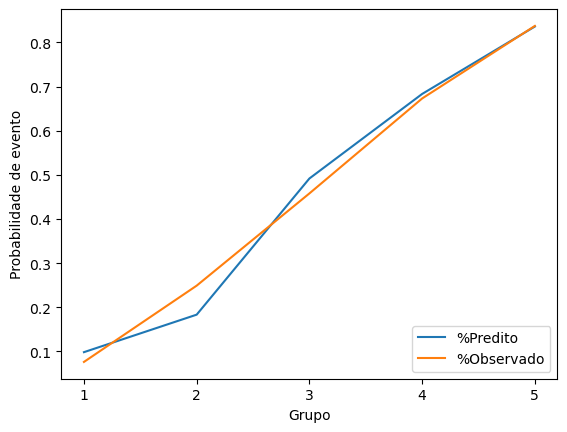

In [62]:
# Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = cat_prob['pct_sobrev'].plot(label='%Predito')
ax = cat_prob['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [65]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#Gini
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 77.89%
KS: 58.40% 
GINI: 66.22%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [66]:
reglog_2 = smf.logit(formula='''flag_doente 
                            ~ age
                            + sex
                            + trestbps
                            + thalach
                            + exang
                            + oldpeak
                            ''', 
                   data=df).fit()
reglog_2.summary()

Optimization terminated successfully.
         Current function value: 0.465773
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.3247
Time:                        12:54:07   Log-Likelihood:                -141.13
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 7.997e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6203      1.988     -0.815      0.415      -5.516       2.275
age            0.0252      0.019      1.334      0.182      -0.012       0.062
sex            1.4690      0.341      4.311      0.000       0.801       2.137
trestbps       0.0142      0.009      1.577      0.115      -0.003       0.032
thalach       -0.0260      0.008     -3.274      0.001      -0.042      -0.010
exang          1.4391      0.331      4.348      0.000       0.790       2.088
oldpeak        0.5998      0.148      4.044      0.000       0.309       0.891
==============================================================================
"""

In [70]:
df['predito'] = reglog_2.predict(df)

acc = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# AUC
fpr, tpr, thresholds = metrics.roc_curve(
    df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)

# Gini
gini = 2*auc_ - 1
# KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'],
              df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 78.55%
KS: 58.86% 
AUC: 85.80% 
GINI: 71.61%
